In [29]:
import numpy
import LibsControl
import matplotlib.pyplot as plt


#three connected wheels dynamical system

c0 = 2.697*1e-3
c1 = 2.66 *1e-3
c2 = 3.05 *1e-3
c3 = 2.85 *1e-3

d0 = 6.78*1e-5
d1 = 8.01*1e-5
d2 = 8.82*1e-5

J  = 2.25e-4

mat_a = numpy.zeros((6, 6))
mat_b = numpy.zeros((6, 2))
mat_c = numpy.zeros((6, 6))


    
mat_a[0][3] =  1.0
mat_a[1][4] =  1.0
mat_a[2][5] =  1.0

mat_a[3][0] =  (-c0-c1)/J
mat_a[3][1] =   c1/J
mat_a[3][3] =  -d0/J

mat_a[4][0] =  c1/J
mat_a[4][1] =  (-c1-c2)/J
mat_a[4][2] =  c2/J
mat_a[4][4] =  -d1/J

mat_a[5][1] =   c2/J
mat_a[5][2] =   -c2/J
mat_a[5][3] =   -c3/J
mat_a[5][5] =  -d2/J


mat_b[3][0] = c0/J
mat_b[5][1] = c3/J


mat_c[0][0] = 1.0
mat_c[1][1] = 1.0
mat_c[2][2] = 1.0
mat_c[3][3] = 1.0
mat_c[4][4] = 1.0
mat_c[5][5] = 1.0



dt          = 1.0/1000.0

steps       = 10000


ds   = LibsControl.DynamicalSystem(mat_a, mat_b, mat_c, dt=dt)


u_batch = []
x_batch = []

#obtain trajectory
x       = numpy.zeros((mat_a.shape[0], 1))
u       = numpy.zeros((mat_b.shape[1], 1))

for i in range(steps):  
    
    if i%200 == 0:
        u    = numpy.random.randint(0, 3, (mat_b.shape[1], 1)) - 1
    
    u_batch.append(u[:, 0])
    x_batch.append(x[:, 0])

    x, y = ds.forward(x, u)

u_batch = numpy.array(u_batch)
x_batch = numpy.array(x_batch)

#add some noise
x_batch+= 0.001*numpy.random.randn(x_batch.shape[0], x_batch.shape[1])


In [30]:
#find models
models, loss = LibsControl.identification(u_batch, x_batch, dt)

model ID			density[%]			loss
0 				 4.2 				 33166797140797.65
1 				 8.3 				 51972986553960.77
2 				 12.5 				 40603456911239.11
3 				 16.7 				 6275347536809.95
4 				 20.8 				 2429673021538.18
5 				 25.0 				 554272234962.72
6 				 29.2 				 56501806014.25
7 				 33.3 				 2505034.42
8 				 37.5 				 5879594.47
9 				 41.7 				 4142873.51
10 				 45.8 				 4074464.57
11 				 50.0 				 4074464.57
12 				 54.2 				 4074464.56
13 				 58.3 				 4039349.43
14 				 62.5 				 3898208.63
15 				 66.7 				 3591129.8
16 				 70.8 				 3432413.6
17 				 75.0 				 2283221.79
18 				 79.2 				 1212814.26
19 				 83.3 				 609249.33



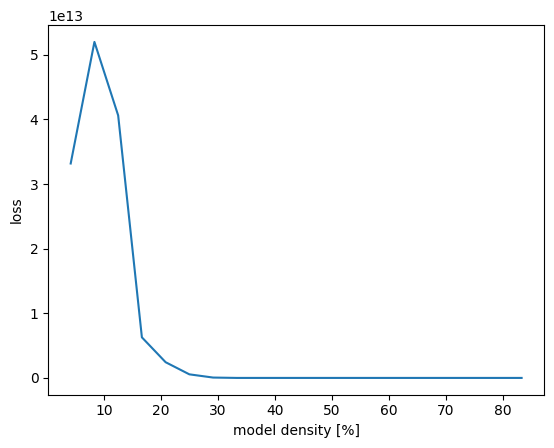

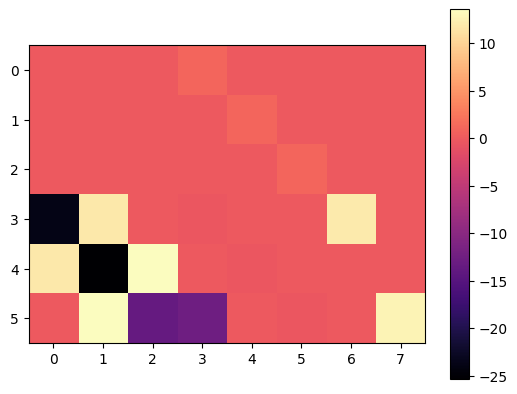

In [31]:
#print and plot results
print("model ID\t\t\tdensity[%]\t\t\tloss")

density = []
for i in range(models.shape[0]):
    density_ = 100*(numpy.abs(models[i]) > 10**-5).sum()/(models.shape[1]*models.shape[2])
    density.append(density_)
    print(i, "\t\t\t\t", round(density_, 1), "\t\t\t\t", round(loss[i], 2))

print()

plt.xlabel("model density [%]")
plt.ylabel("loss")
plt.plot(density, loss)
plt.show()


plt.imshow(models[7].T , cmap = 'magma' )
plt.colorbar()
plt.show()



In [32]:
#split model to system dynamics matrices a, b

model = models[7]

ab      = model.T
order   = x_batch.shape[1]
a = ab[:, 0:order]
b = ab[:, order:]


print("ground truth = ")
print(numpy.round(ds.mat_a, 3))
print(numpy.round(ds.mat_b, 3))

print("\n\n\n")

print("model = ")
print(numpy.round(a, 3))
print(numpy.round(b, 3))

ground truth = 
[[  0.      0.      0.      1.      0.      0.   ]
 [  0.      0.      0.      0.      1.      0.   ]
 [  0.      0.      0.      0.      0.      1.   ]
 [-23.809  11.822   0.     -0.301   0.      0.   ]
 [ 11.822 -25.378  13.556   0.     -0.356   0.   ]
 [  0.     13.556 -13.556 -12.667   0.     -0.392]]
[[ 0.     0.   ]
 [ 0.     0.   ]
 [ 0.     0.   ]
 [11.987  0.   ]
 [ 0.     0.   ]
 [ 0.    12.667]]




model = 
[[  0.      0.      0.      0.998   0.      0.   ]
 [  0.      0.      0.      0.      1.      0.   ]
 [  0.      0.      0.      0.      0.      1.001]
 [-23.813  11.824   0.     -0.303   0.      0.   ]
 [ 11.825 -25.378  13.555   0.     -0.356   0.   ]
 [  0.     13.556 -13.555 -12.668   0.     -0.393]]
[[ 0.     0.   ]
 [ 0.     0.   ]
 [ 0.     0.   ]
 [11.991  0.   ]
 [ 0.     0.   ]
 [ 0.    12.668]]
